In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/80-cereals/cereal.csv
/kaggle/input/cereal-datasetcereal-csv/cereal.csv


# Introduction

The cereal dataset provides a detailed nutritional and consumer rating analysis of 77 cereals from various manufacturers. It includes key attributes like calories, protein, fat, sugars, vitamins, and ratings, enabling us to evaluate their healthiness and consumer appeal. This analysis aims to uncover trends, relationships, and outliers, offering insights into the cereal market's nutritional and commercial landscape. Through visualizations and statistics, we will explore patterns such as the impact of sugars on ratings, nutritional differences across manufacturers, and correlations between ingredients.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Exploration

In [3]:
cereal_data = pd.read_csv('/kaggle/input/80-cereals/cereal.csv')


In [4]:
# Display basic dataset information
print("Dataset Information:")
print(cereal_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None


In [5]:
# Display the first few rows of the dataset
print("\nFirst 5 rows:")
print(cereal_data.head())


First 5 rows:
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [6]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(cereal_data.describe())


Summary Statistics:
         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   

In [7]:
# Distribution of cereals by manufacturer
print("\nCereal Count by Manufacturer:")
print(cereal_data['mfr'].value_counts())


Cereal Count by Manufacturer:
mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


In [8]:
# Distribution of cereals by type (hot/cold)
print("\nCereal Count by Type:")
print(cereal_data['type'].value_counts())


Cereal Count by Type:
type
C    74
H     3
Name: count, dtype: int64


# Insights and Analysis# 

In [9]:
# Find highest and lowest-rated cereals
highest_rated = cereal_data.loc[cereal_data['rating'].idxmax()]
lowest_rated = cereal_data.loc[cereal_data['rating'].idxmin()]
print("\nHighest-rated Cereal:")
print(highest_rated[['name', 'rating']])
print("\nLowest-rated Cereal:")
print(lowest_rated[['name', 'rating']])


Highest-rated Cereal:
name      All-Bran with Extra Fiber
rating                    93.704912
Name: 3, dtype: object

Lowest-rated Cereal:
name      Cap'n'Crunch
rating       18.042851
Name: 10, dtype: object


# Visualizations

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


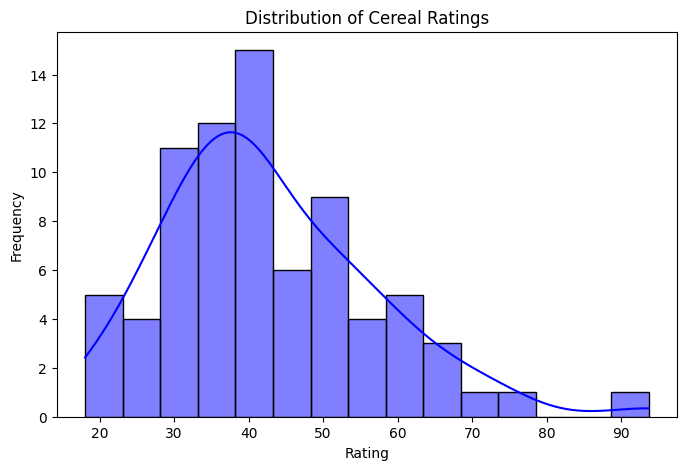

In [10]:
# Visualization 1: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(cereal_data['rating'], kde=True, bins=15, color='blue')
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

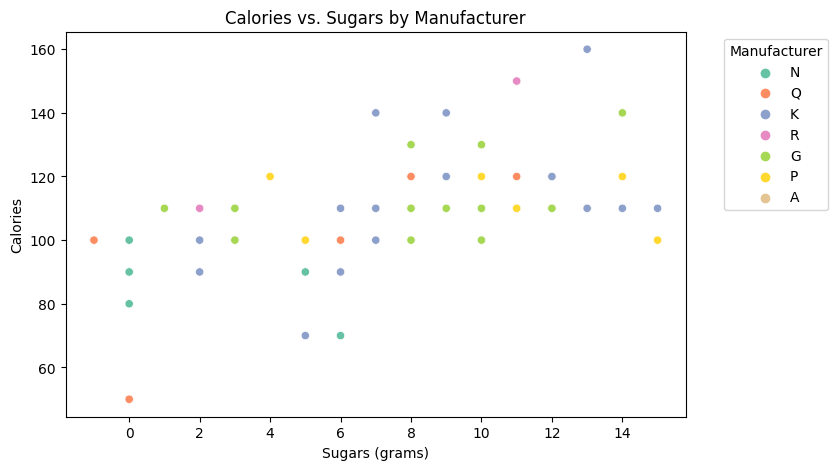

In [11]:
# Visualization 2: Calories vs. Sugars
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sugars', y='calories', data=cereal_data, hue='mfr', palette='Set2')
plt.title('Calories vs. Sugars by Manufacturer')
plt.xlabel('Sugars (grams)')
plt.ylabel('Calories')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

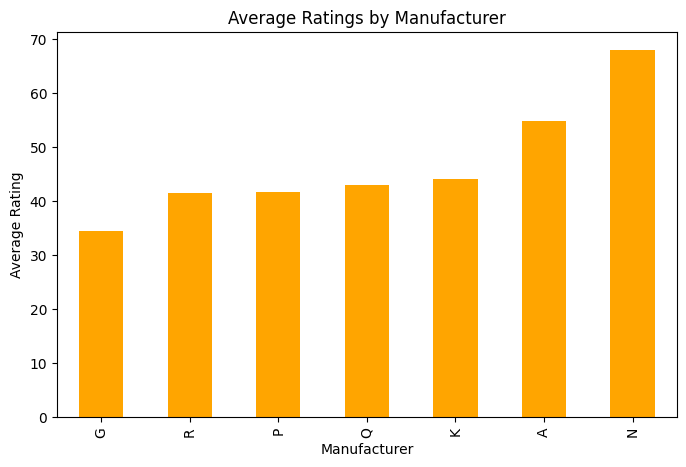

In [12]:
# Visualization 3: Average Ratings by Manufacturer
avg_ratings = cereal_data.groupby('mfr')['rating'].mean().sort_values()
plt.figure(figsize=(8, 5))
avg_ratings.plot(kind='bar', color='orange')
plt.title('Average Ratings by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()

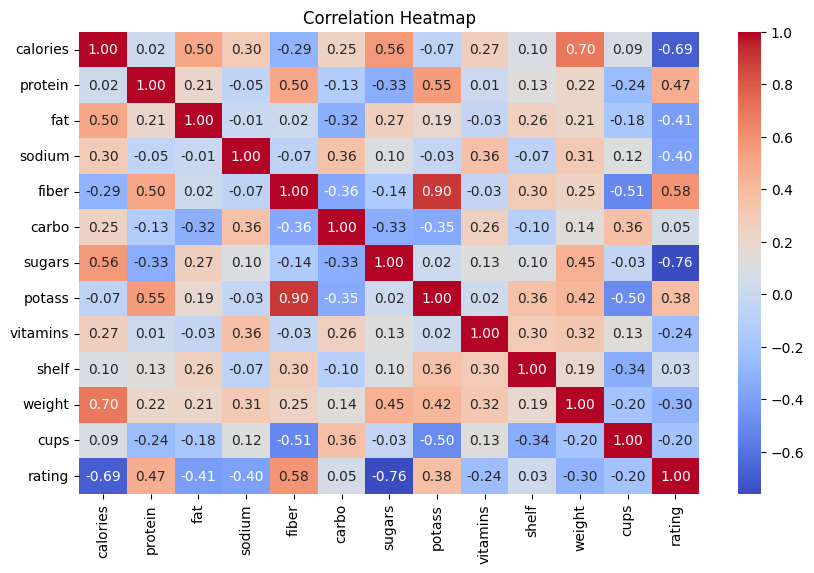

In [13]:
# Ensure only numeric columns are passed to the correlation function
numeric_data = cereal_data.select_dtypes(include=['float64', 'int64'])

# Visualization 4: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Conclusion
The analysis highlights significant nutritional differences across cereals and manufacturers. High-sugar cereals tend to have lower ratings, whereas high-fiber cereals often score better. General Mills and Kellogg's dominate the market, with notable variations in product ratings. This analysis provides valuable insights into consumer preferences and health implications for cereal products.













